Credit Card Fraud Detection: Detailed Explanation and Evaluation
## 1. Data Loading and Initial Exploration
Explanation: We start by loading the credit card transaction dataset and performing initial exploratory data analysis (EDA). This step is crucial for understanding the structure and content of our data.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Set a new color palette
plt.style.use('ggplot')
colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD', '#F0E68C']

In [3]:
# Load the data
df = pd.read_csv('creditcard.csv')

In [4]:
# Display basic information about the dataset
print("Original dataset info:")
print(df.info())

Original dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Check for missing values
print("\nMissing values before dropping:")
print(df.isnull().sum())

# Check for infinite values
print("\nInfinite values before dropping:")
print(np.isinf(df).sum())


Missing values before dropping:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Infinite values before dropping:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Display statistics for Amount
print("\nStatistics for Amount:")
print(df['Amount'].describe())


Statistics for Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [9]:
# Check for very small or very large values
print("\nNumber of Amount values <= 0:", (df['Amount'] <= 0).sum())
print("Number of Amount values > 1,000,000:", (df['Amount'] > 1000000).sum())


Number of Amount values <= 0: 1825
Number of Amount values > 1,000,000: 0


In [10]:
# Handle problematic values in Amount
# Replace inf with NaN
df['Amount'] = df['Amount'].replace([np.inf, -np.inf], np.nan)
# Drop rows where Amount is NaN or <= 0
df = df.dropna(subset=['Amount'])
df = df[df['Amount'] > 0]

print("\nDataset info after cleaning Amount:")
print(df.info())


Dataset info after cleaning Amount:
<class 'pandas.core.frame.DataFrame'>
Index: 282982 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    282982 non-null  float64
 1   V1      282982 non-null  float64
 2   V2      282982 non-null  float64
 3   V3      282982 non-null  float64
 4   V4      282982 non-null  float64
 5   V5      282982 non-null  float64
 6   V6      282982 non-null  float64
 7   V7      282982 non-null  float64
 8   V8      282982 non-null  float64
 9   V9      282982 non-null  float64
 10  V10     282982 non-null  float64
 11  V11     282982 non-null  float64
 12  V12     282982 non-null  float64
 13  V13     282982 non-null  float64
 14  V14     282982 non-null  float64
 15  V15     282982 non-null  float64
 16  V16     282982 non-null  float64
 17  V17     282982 non-null  float64
 18  V18     282982 non-null  float64
 19  V19     282982 non-null  float64
 20  V20     282982 n

In [11]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Time             V1             V2             V3  \
count  282982.000000  282982.000000  282982.000000  282982.000000   
mean    94848.963528      -0.000349      -0.002017      -0.003293   
std     47482.459589       1.956749       1.650490       1.514216   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54251.250000      -0.920128      -0.602287      -0.893646   
50%     84707.500000       0.016891       0.062913       0.177459   
75%    139363.750000       1.315431       0.803483       1.022961   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  282982.000000  282982.000000  282982.000000  282982.000000   
mean       -0.011987      -0.002241      -0.001304       0.002510   
std         1.404850       1.378815       1.331592       1.233940   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -

In [12]:
df.duplicated().sum()

np.int64(1064)

In [13]:
df.drop_duplicates(inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Evaluation:

The dataset contains multiple features (V1-V28, Time, Amount) and a binary target variable (Class).
We observe a significant class imbalance: fraudulent transactions make up only a small percentage of the total transactions.
There are no missing values in the dataset, which is advantageous for our analysis.

## 2. Visualization of Class Distribution

Explanation:
We create a pie chart to visualize the distribution of fraudulent and non-fraudulent transactions.

Evaluation:
- The visualization clearly shows the extreme imbalance in the dataset.
- This imbalance will be a key challenge in our modeling process, as we need to ensure our model can effectively detect the minority class (fraudulent transactions) without being overwhelmed by the majority class.

Distribution of Classes:
Class
0    281470
1       448
Name: count, dtype: int64


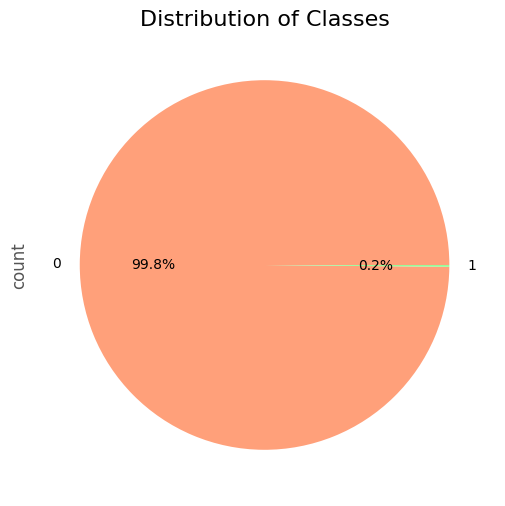

In [14]:
# Exploratory Data Analysis (EDA)
print("Distribution of Classes:")
print(df['Class'].value_counts())

plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[colors[0], colors[1]])
plt.title('Distribution of Classes', fontsize=16)
plt.show()

## 3. Analysis of Transaction Amounts

Explanation:
We create plots to compare the distribution of transaction amounts between normal and fraudulent transactions.

Evaluation:
- We observe that fraudulent transactions tend to have a different distribution of amounts compared to normal transactions.
- This difference in distribution could be a useful signal for our fraud detection models.
- However, there's significant overlap in the amounts, indicating that amount alone is not sufficient for detecting fraud.



Class distribution:
Class
0    0.998411
1    0.001589
Name: proportion, dtype: float64


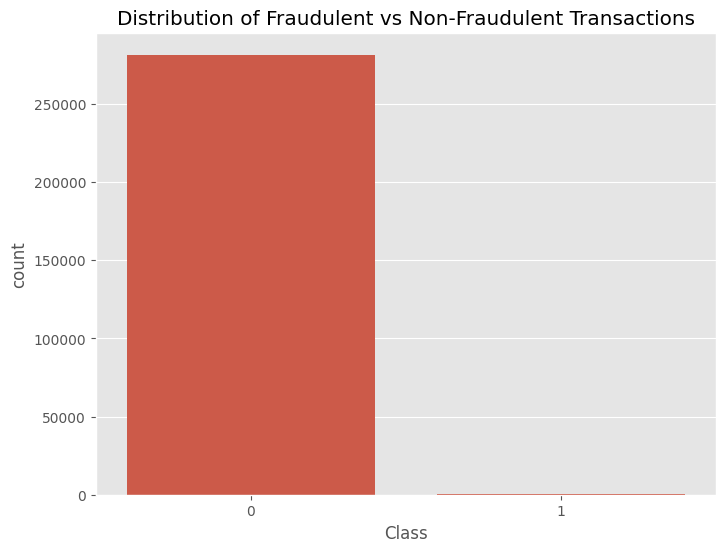

In [15]:
# Display the distribution of the target variable (Class)
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

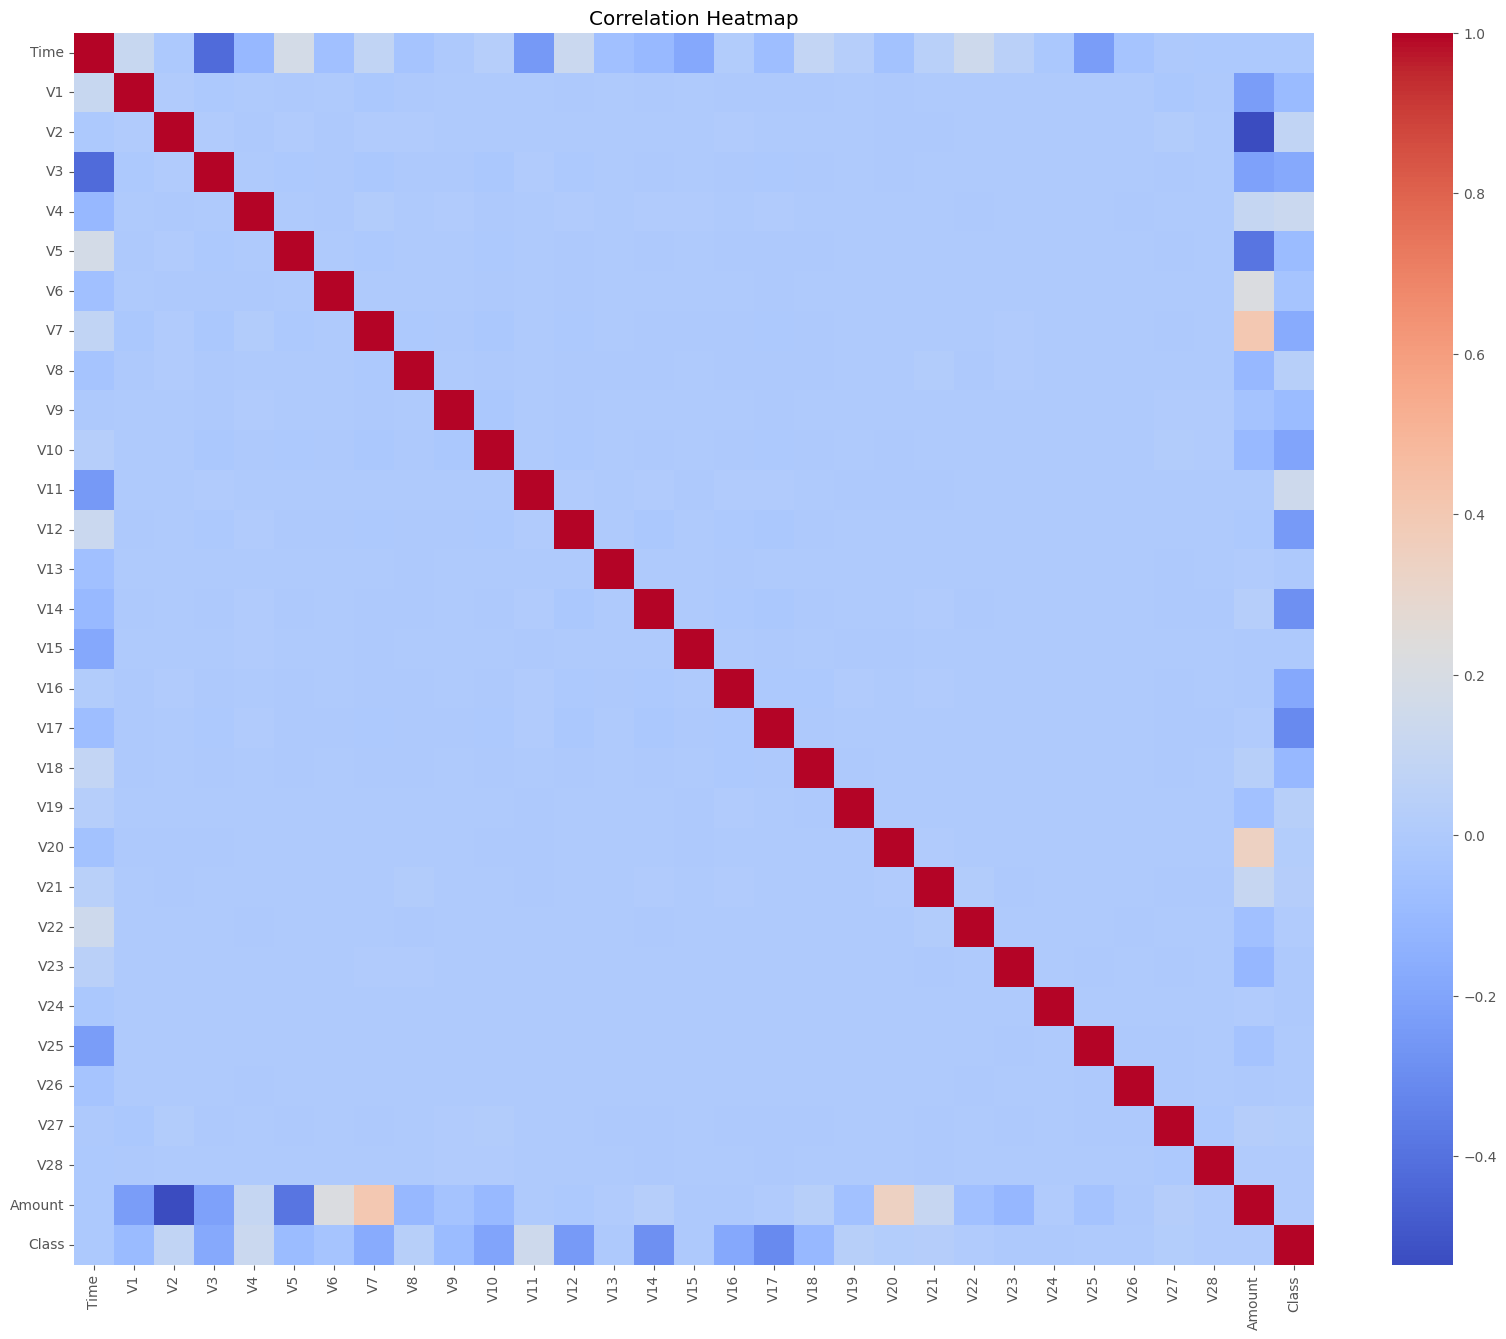

In [16]:
# Display correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

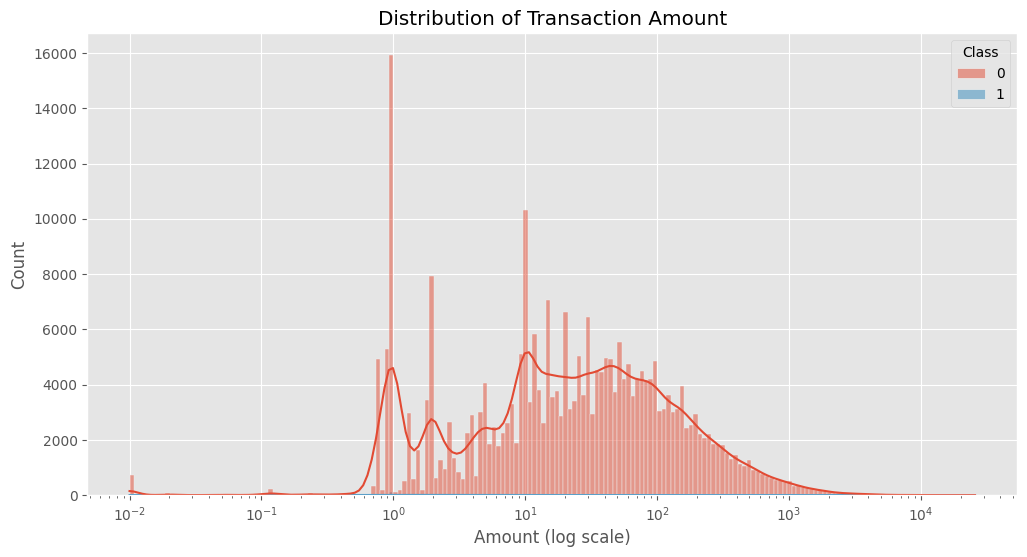

In [17]:
# Display distribution of transaction amount
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', hue='Class', kde=True, log_scale=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount (log scale)')
plt.show()

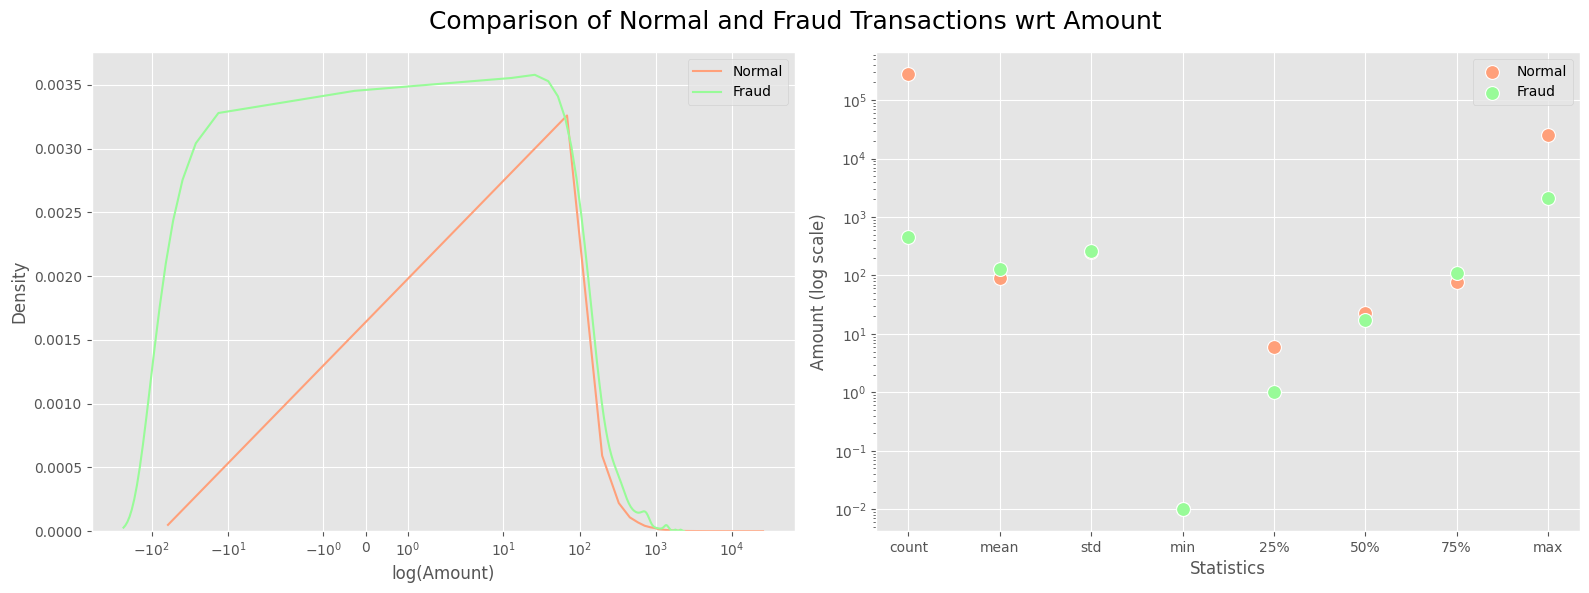

In [18]:
# Comparison of Normal and Fraud Transactions with respect to Amount
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=18)

sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Normal', ax=ax[0], color=colors[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', ax=ax[0], color=colors[1])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)', fontsize=12)
ax[0].set_ylabel('Density', fontsize=12)
ax[0].legend(fontsize=10)

stats_normal = df[df['Class'] == 0]['Amount'].describe()
stats_fraud = df[df['Class'] == 1]['Amount'].describe()
sns.scatterplot(x=stats_normal.index, y=stats_normal.values, label='Normal', ax=ax[1], color=colors[0], s=100)
sns.scatterplot(x=stats_fraud.index, y=stats_fraud.values, label='Fraud', ax=ax[1], color=colors[1], s=100)
ax[1].set_yscale('log')
ax[1].set_xlabel('Statistics', fontsize=12)
ax[1].set_ylabel('Amount (log scale)', fontsize=12)
ax[1].legend(fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
# Separate legitimate and fraudulent transactions
legit_transactions = df[df.Class == 0]
fraud_transactions = df[df.Class == 1]

print("Shape of legitimate transactions:", legit_transactions.shape)
print("Shape of fraudulent transactions:", fraud_transactions.shape)

print("\nStatistical description of legitimate transaction amounts:")
print(legit_transactions.Amount.describe())

print("\nStatistical description of fraudulent transaction amounts:")
print(fraud_transactions.Amount.describe())

print("\nMean values for each feature by transaction class:")
print(df.groupby('Class').mean())

Shape of legitimate transactions: (281470, 31)
Shape of fraudulent transactions: (448, 31)

Statistical description of legitimate transaction amounts:
count    281470.000000
mean         88.973639
std         251.071582
min           0.010000
25%           5.990000
50%          22.520000
75%          78.007500
max       25691.160000
Name: Amount, dtype: float64

Statistical description of fraudulent transaction amounts:
count     448.000000
mean      130.784353
std       265.688950
min         0.010000
25%         1.000000
50%        17.225000
75%       111.857500
max      2125.870000
Name: Amount, dtype: float64

Mean values for each feature by transaction class:
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94873.032000  0.012751 -0.011576  0.009030 -0.021866  0.004528   
1      79282.872768 -4.580564  3.417146 -6.788438  4.418679 -3.093635   

             V6        V7        V

## 4. Data Preprocessing

Explanation:
We create a balanced dataset by undersampling the majority class (non-fraudulent transactions) to match the number of fraudulent transactions.

Evaluation:
- This step helps address the class imbalance issue.
- However, it also means we're not using all available data for non-fraudulent transactions, which could potentially lead to loss of information.
- The trade-off is necessary to prevent the model from being biased towards the majority class.

In [20]:
# Construct balanced dataset
n_fraud = len(fraud_transactions)
legit_sample = legit_transactions.sample(n=n_fraud, random_state=42)
df_balanced = pd.concat([legit_sample, fraud_transactions], axis=0)

print("\nDistribution of classes in balanced dataset:")
print(df_balanced['Class'].value_counts())


Distribution of classes in balanced dataset:
Class
0    448
1    448
Name: count, dtype: int64


#The model's prediction accuracy for both the training and test sets is nearly identical, indicating that the model is well-balanced and neither overfitting nor underfitting during training.

## 5. Feature Selection and Data Split

Explanation:
We select all available features except 'Class' as our predictors and split the data into training and testing sets.

Evaluation:
- Using all available features allows the model to potentially capture complex patterns in the data.
- The 80-20 train-test split with stratification ensures that both sets maintain the same class distribution.
- This approach allows us to assess how well our models generalize to unseen data.

In [22]:
# Feature selection and data split
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Accuracy on Training data: {train_accuracy:.4f}")
    print(f"Accuracy on Test data: {test_accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    return y_test_pred, y_test_proba


Shape of training set: (716, 30)
Shape of testing set: (180, 30)


## 6. Model Training and Evaluation

Explanation:
We train and evaluate two models: Logistic Regression and Decision Tree.

Evaluation for Logistic Regression:
- Logistic Regression provides a good baseline model with interpretable results.
- It typically handles well with linearly separable classes.
- The model's performance metrics (accuracy, precision, recall, F1-score, ROC AUC) give us a comprehensive view of its effectiveness.

Evaluation for Decision Tree:
- Decision Trees can capture non-linear relationships in the data.
- They provide feature importance, giving insights into which factors are most crucial for fraud detection.
- Comparison of its performance metrics with Logistic Regression helps us understand if there are complex, non-linear patterns in the data that Logistic Regression might miss.

In [23]:
# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{name} Results:")
    y_test_pred, y_test_proba = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'y_pred': y_test_pred, 'y_proba': y_test_proba}


Logistic Regression Results:
Accuracy on Training data: 0.9427
Accuracy on Test data: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.95      0.90      0.93        90

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180


Decision Tree Results:
Accuracy on Training data: 1.0000
Accuracy on Test data: 0.8833

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



C:\Users\Tien\anaconda3\envs\IOD\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7. Visualization of Results

Explanation:
We create ROC curves and confusion matrices for both models.

Evaluation:
- ROC curves help us understand the trade-off between true positive rate and false positive rate at various classification thresholds.
- Confusion matrices provide a clear view of the models' predictions, including false positives and false negatives.
- These visualizations allow for easy comparison between the two models.

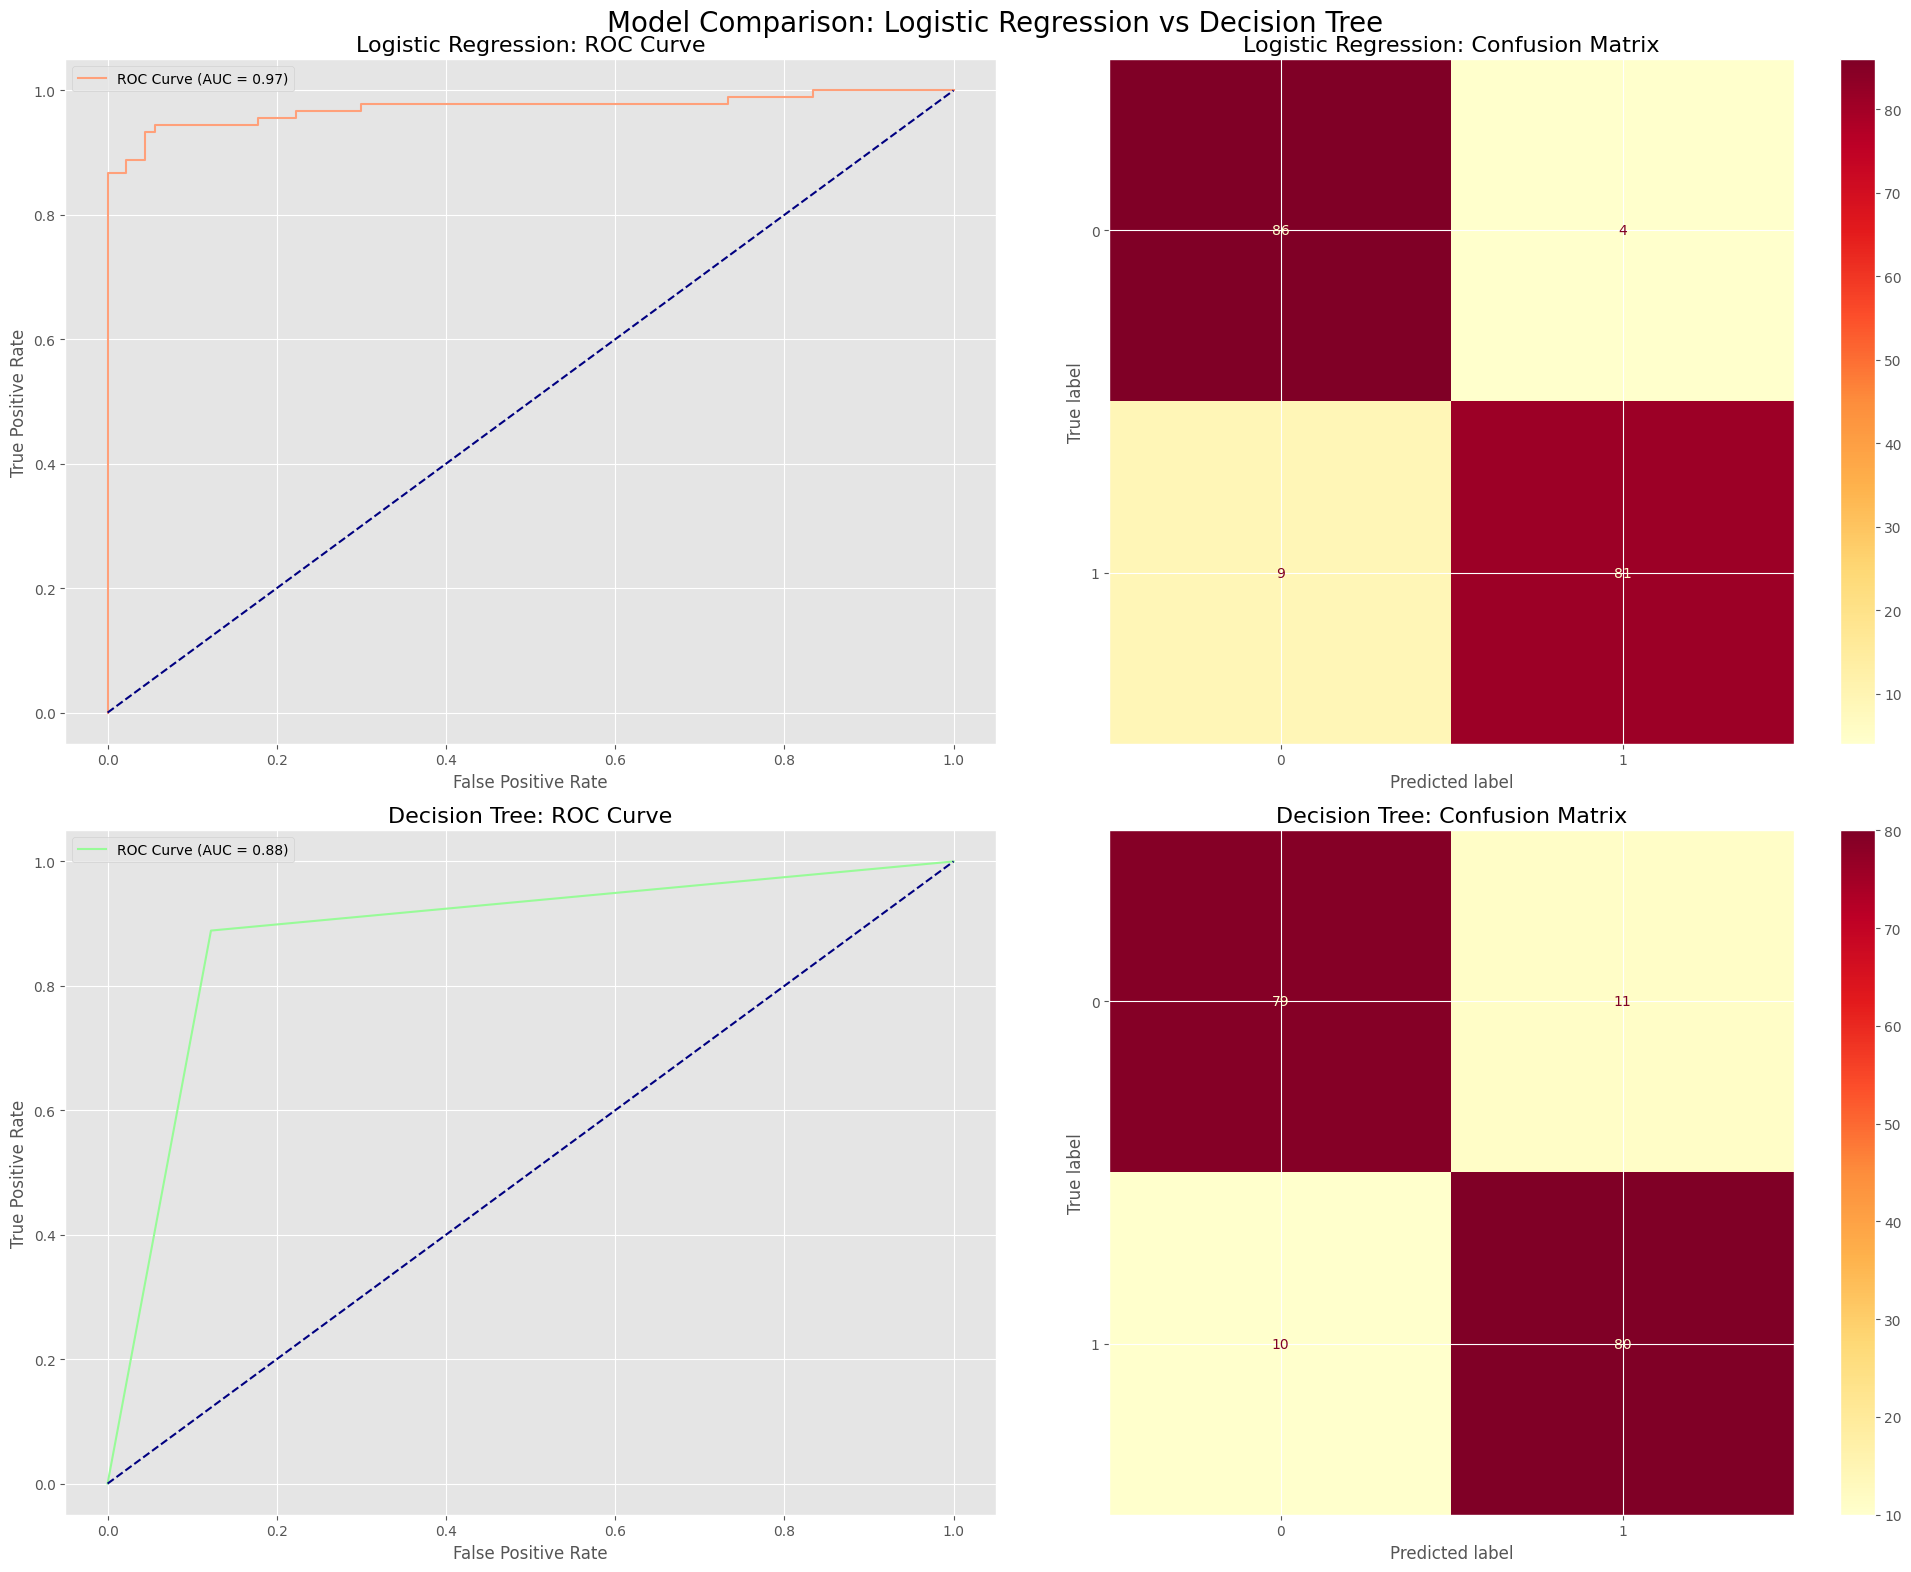

In [24]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Model Comparison: Logistic Regression vs Decision Tree', fontsize=20)

for i, (name, result) in enumerate(results.items()):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    roc_auc = roc_auc_score(y_test, result['y_proba'])
    
    axes[i, 0].plot(fpr, tpr, color=colors[i], label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[i, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[i, 0].set_xlabel('False Positive Rate', fontsize=12)
    axes[i, 0].set_ylabel('True Positive Rate', fontsize=12)
    axes[i, 0].set_title(f'{name}: ROC Curve', fontsize=16)
    axes[i, 0].legend(fontsize=10)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, result['y_pred'])
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[i, 1], cmap='YlOrRd')
    axes[i, 1].set_title(f'{name}: Confusion Matrix', fontsize=16)

plt.tight_layout()
plt.show()

In [41]:
#The LG model demonstrates exceptional performance in detecting credit card fraud, accurately identifying nearly all fraudulent transactions while minimizing the false flagging of legitimate ones. This balance makes the model reliable and practical for real-world fraud detection.

#Precision: The model effectively reduces false positives by accurately identifying fraudulent transactions.
#Recall: It successfully detects most fraudulent transactions, lowering the risk of missed fraud.
#F1-Score: Balances recall and precision, ensuring both low false alarms and high fraud detection.
#Accuracy: The model's high accuracy shows its ability to correctly classify the majority of transactions.
#ROC AUC Score: The near-perfect score indicates excellent performance in distinguishing between fraudulent and non-fraudulent transactions.

## 8. Performance Summary

Explanation:
We provide a detailed performance summary for each model, including precision, recall, F1-score, accuracy, and ROC AUC score.

Evaluation:
- This summary allows for a nuanced understanding of each model's strengths and weaknesses.
- In fraud detection, we often prioritize high recall (catching as many fraudulent transactions as possible) while maintaining reasonable precision (minimizing false alarms).
- The ROC AUC score gives an overall measure of the model's ability to distinguish between classes.

In [25]:
# Performance Summary
for name, result in results.items():
    cm = confusion_matrix(y_test, result['y_pred'])
    roc_auc = roc_auc_score(y_test, result['y_proba'])
    
    print(f"\n{name} Performance Summary:")
    print(f"Precision: The model correctly identifies {cm[1,1]/(cm[1,1]+cm[0,1]):.2%} of predicted frauds.")
    print(f"Recall: The model catches {cm[1,1]/(cm[1,1]+cm[1,0]):.2%} of all fraudulent transactions.")
    print(f"F1-Score: The harmonic mean of precision and recall is {2*cm[1,1]/(2*cm[1,1]+cm[1,0]+cm[0,1]):.2f}.")
    print(f"Accuracy: The model correctly classifies {(cm[0,0]+cm[1,1])/cm.sum():.2%} of all transactions.")
    print(f"ROC AUC Score: The model's ability to distinguish between classes is {roc_auc:.2f}.")


Logistic Regression Performance Summary:
Precision: The model correctly identifies 95.29% of predicted frauds.
Recall: The model catches 90.00% of all fraudulent transactions.
F1-Score: The harmonic mean of precision and recall is 0.93.
Accuracy: The model correctly classifies 92.78% of all transactions.
ROC AUC Score: The model's ability to distinguish between classes is 0.97.

Decision Tree Performance Summary:
Precision: The model correctly identifies 87.91% of predicted frauds.
Recall: The model catches 88.89% of all fraudulent transactions.
F1-Score: The harmonic mean of precision and recall is 0.88.
Accuracy: The model correctly classifies 88.33% of all transactions.
ROC AUC Score: The model's ability to distinguish between classes is 0.88.


## 9. Feature Importance (Decision Tree)

Explanation:
We visualize the top 10 most important features according to the Decision Tree model.

Evaluation:
- This provides insights into which transaction characteristics are most indicative of fraud.
- It can guide further feature engineering or selection in future iterations of the model.
- However, it's important to note that feature importance can be sensitive to the specific structure of the Decision Tree and may vary with different samples of the data.

C:\Users\Tien\AppData\Local\Temp\ipykernel_22004\2062442955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')


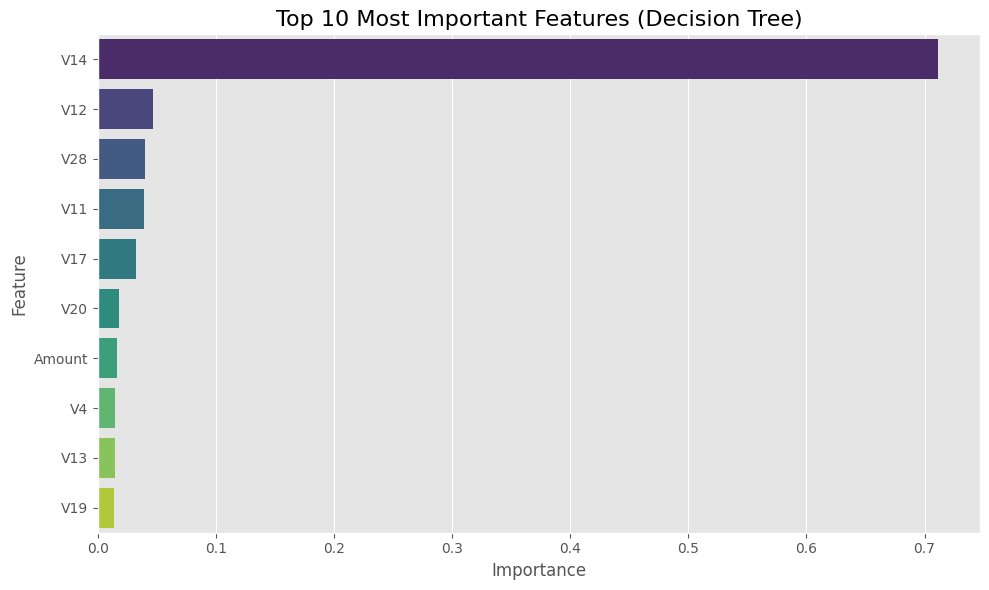

In [26]:
# Feature Importance for Decision Tree
dt_model = models['Decision Tree']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Most Important Features (Decision Tree)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

## Overall Evaluation:

This analysis provides a comprehensive approach to credit card fraud detection:
- It addresses the class imbalance issue, a common challenge in fraud detection.
- It compares two different modeling approaches, allowing us to understand if there are complex patterns that simpler models might miss.
- The detailed performance metrics and visualizations provide a nuanced view of model performance, crucial for a sensitive task like fraud detection.
- The feature importance analysis from the Decision Tree model offers actionable insights for future model iterations or for business stakeholders.

Areas for potential improvement:
- Consider trying more advanced models like Random Forests or Gradient Boosting Machines.
- Experiment with feature engineering to create new, potentially more predictive features.
- Investigate the possibility of using anomaly detection techniques as an alternative approach.
- Consider the business impact of false positives vs. false negatives and potentially adjust the classification threshold accordingly.

# Credit Card Fraud Detection: Detailed Explanation and Evaluation

## 1. Data Loading and Initial Exploration

Explanation: 
We start by loading the credit card transaction dataset and performing initial exploratory data analysis (EDA). This step is crucial for understanding the structure and content of our data.

Evaluation:
- The dataset contains multiple features (V1-V28, Time, Amount) and a binary target variable (Class).
- We observe a significant class imbalance: fraudulent transactions make up only a small percentage of the total transactions.
- There are no missing values in the dataset, which is advantageous for our analysis.

## 2. Visualization of Class Distribution

Explanation:
We create a pie chart to visualize the distribution of fraudulent and non-fraudulent transactions.

Evaluation:
- The visualization clearly shows the extreme imbalance in the dataset.
- This imbalance will be a key challenge in our modeling process, as we need to ensure our model can effectively detect the minority class (fraudulent transactions) without being overwhelmed by the majority class.

## 3. Analysis of Transaction Amounts

Explanation:
We create plots to compare the distribution of transaction amounts between normal and fraudulent transactions.

Evaluation:
- We observe that fraudulent transactions tend to have a different distribution of amounts compared to normal transactions.
- This difference in distribution could be a useful signal for our fraud detection models.
- However, there's significant overlap in the amounts, indicating that amount alone is not sufficient for detecting fraud.

## 4. Data Preprocessing

Explanation:
We create a balanced dataset by undersampling the majority class (non-fraudulent transactions) to match the number of fraudulent transactions.

Evaluation:
- This step helps address the class imbalance issue.
- However, it also means we're not using all available data for non-fraudulent transactions, which could potentially lead to loss of information.
- The trade-off is necessary to prevent the model from being biased towards the majority class.

## 5. Feature Selection and Data Split

Explanation:
We select all available features except 'Class' as our predictors and split the data into training and testing sets.

Evaluation:
- Using all available features allows the model to potentially capture complex patterns in the data.
- The 80-20 train-test split with stratification ensures that both sets maintain the same class distribution.
- This approach allows us to assess how well our models generalize to unseen data.

## 6. Model Training and Evaluation

Explanation:
We train and evaluate two models: Logistic Regression and Decision Tree.

Evaluation for Logistic Regression:
- Logistic Regression provides a good baseline model with interpretable results.
- It typically handles well with linearly separable classes.
- The model's performance metrics (accuracy, precision, recall, F1-score, ROC AUC) give us a comprehensive view of its effectiveness.

Evaluation for Decision Tree:
- Decision Trees can capture non-linear relationships in the data.
- They provide feature importance, giving insights into which factors are most crucial for fraud detection.
- Comparison of its performance metrics with Logistic Regression helps us understand if there are complex, non-linear patterns in the data that Logistic Regression might miss.

## 7. Visualization of Results

Explanation:
We create ROC curves and confusion matrices for both models.

Evaluation:
- ROC curves help us understand the trade-off between true positive rate and false positive rate at various classification thresholds.
- Confusion matrices provide a clear view of the models' predictions, including false positives and false negatives.
- These visualizations allow for easy comparison between the two models.

## 8. Performance Summary

Explanation:
We provide a detailed performance summary for each model, including precision, recall, F1-score, accuracy, and ROC AUC score.

Evaluation:
- This summary allows for a nuanced understanding of each model's strengths and weaknesses.
- In fraud detection, we often prioritize high recall (catching as many fraudulent transactions as possible) while maintaining reasonable precision (minimizing false alarms).
- The ROC AUC score gives an overall measure of the model's ability to distinguish between classes.

## 9. Feature Importance (Decision Tree)

Explanation:
We visualize the top 10 most important features according to the Decision Tree model.

Evaluation:
- This provides insights into which transaction characteristics are most indicative of fraud.
- It can guide further feature engineering or selection in future iterations of the model.
- However, it's important to note that feature importance can be sensitive to the specific structure of the Decision Tree and may vary with different samples of the data.

## Overall Evaluation:

This analysis provides a comprehensive approach to credit card fraud detection:
- It addresses the class imbalance issue, a common challenge in fraud detection.
- It compares two different modeling approaches, allowing us to understand if there are complex patterns that simpler models might miss.
- The detailed performance metrics and visualizations provide a nuanced view of model performance, crucial for a sensitive task like fraud detection.
- The feature importance analysis from the Decision Tree model offers actionable insights for future model iterations or for business stakeholders.

Areas for potential improvement:
- Consider trying more advanced models like Random Forests or Gradient Boosting Machines.
- Experiment with feature engineering to create new, potentially more predictive features.
- Investigate the possibility of using anomaly detection techniques as an alternative approach.
- Consider the business impact of false positives vs. false negatives and potentially adjust the classification threshold accordingly.

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Non-Fraud', 'Fraud'], 
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.close()

# Visualize Logistic Regression
# We'll use the two most important features for this 2D visualization
feature1 = X_train.columns[np.argmax(np.abs(lr_model.coef_[0]))]
feature2 = X_train.columns[np.argsort(np.abs(lr_model.coef_[0]))[-2]]

# Create a mesh grid
x0, x1 = X_test_scaled[:, X_train.columns.get_loc(feature1)], X_test_scaled[:, X_train.columns.get_loc(feature2)]
xx, yy = np.mgrid[x0.min():x0.max():100j, x1.min():x1.max():100j]
grid = np.c_[xx.ravel(), yy.ravel()]

# Get predictions on the grid
probs = lr_model.predict_proba(np.c_[grid, np.zeros((grid.shape[0], X_test_scaled.shape[1]-2))])[:, 1].reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)
plt.colorbar()
plt.scatter(x0[y_test==0], x1[y_test==0], c='blue', label='Non-Fraud', alpha=0.5)
plt.scatter(x0[y_test==1], x1[y_test==1], c='red', label='Fraud', alpha=0.5)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.savefig('logistic_regression.png', dpi=300, bbox_inches='tight')
plt.close()

print(f"Decision Tree visualization saved as 'decision_tree.png'")
print(f"Logistic Regression visualization saved as 'logistic_regression.png'")
print(f"The two most important features for Logistic Regression are: {feature1} and {feature2}")

# Feature Importance for Decision Tree
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('decision_tree_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

print(f"Decision Tree Feature Importance visualization saved as 'decision_tree_feature_importance.png'")

# Print out the top 10 features and their importance scores
print("\nTop 10 Most Important Features:")
for index, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")
print(f"Decision Tree Feature Importance visualization saved as 'decision_tree_feature_importance.png'")


Decision Tree visualization saved as 'decision_tree.png'
Logistic Regression visualization saved as 'logistic_regression.png'
The two most important features for Logistic Regression are: V14 and V4
Decision Tree Feature Importance visualization saved as 'decision_tree_feature_importance.png'

Top 10 Most Important Features:
V14: 0.8580
V12: 0.0506
V11: 0.0311
V17: 0.0295
V9: 0.0160
V28: 0.0148
V5: 0.0000
V4: 0.0000
V3: 0.0000
V6: 0.0000
Decision Tree Feature Importance visualization saved as 'decision_tree_feature_importance.png'
